## TD - Pandas - MAtplotlib
A partir des données airbnb, répondez à ces questions en proposant à chaque fois une
visualisation avec seaborn ou matplotlib:

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100
df = pd.read_csv('listings.csv')
df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,528022,https://www.airbnb.com/rooms/528022,20221205143541,2022-12-05,city scrape,Somewhere Else,Highlights<br />*Located only 5 minutes from C...,NaN,https://a0.muscache.com/pictures/bf6fa79c-5863...,2594559,https://www.airbnb.com/users/show/2594559,Els,2012-06-10,"Amsterdam, Netherlands",NaN,within a day,87%,96%,f,https://a0.muscache.com/im/pictures/user/98c88...,https://a0.muscache.com/im/pictures/user/98c88...,Spaarndammer en Zeeheldenbuurt,1,1,"['email', 'phone']",t,t,NaN,Westerpark,NaN,52.39114,4.88846,Private room in boat,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Bed linens"", ""Dishes and silverware"", ""Hange...",$100.00,2,30,2,2,30,30,2.0,30.0,NaN,t,4,16,29,212,2022-12-05,248,37,3,2016-10-06,2022-11-28,4.85,4.88,4.83,4.93,4.90,4.78,4.72,0363 9289 A94D 5C21 A579,f,1,0,1,0,3.30
1,2818,https://www.airbnb.com/rooms/2818,20221205143541,2022-12-05,city scrape,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi<br /...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1,1,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36435,4.94358,Private room in rental unit,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Books and reading material"", ""Smoke alarm"", ...",$59.00,3,28,3,3,1125,1125,3.0,1125.0,NaN,t,6,27,27,27,2022-12-05,314,29,1,2009-03-30,2022-11-06,4.89,4.93,4.99,4.97,4.98,4.69,4.81,0363 5F3A 5684 6750 D14D,f,1,0,1,0,1.88
2,20168,https://www.airbnb.com/rooms/20168,20221205143541,2022-12-05,previous scrape,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Netherlands",+ (Phone number hidden by Airbnb),within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,3,5,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36407,4.89393,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Smoke alarm"", ""Bed linens"", ""Hangers"", ""Wifi...",$106.00,1,365,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2022-12-05,339,0,0,2010-03-02,2020-04-09,4.44,4.69,4.79,4.63,4.6

- 1. Calculez le nombre d’host et le nombre de review par quartier.
(neighbourhood_cleansed)?

<AxesSubplot: xlabel='neighbourhood_cleansed'>

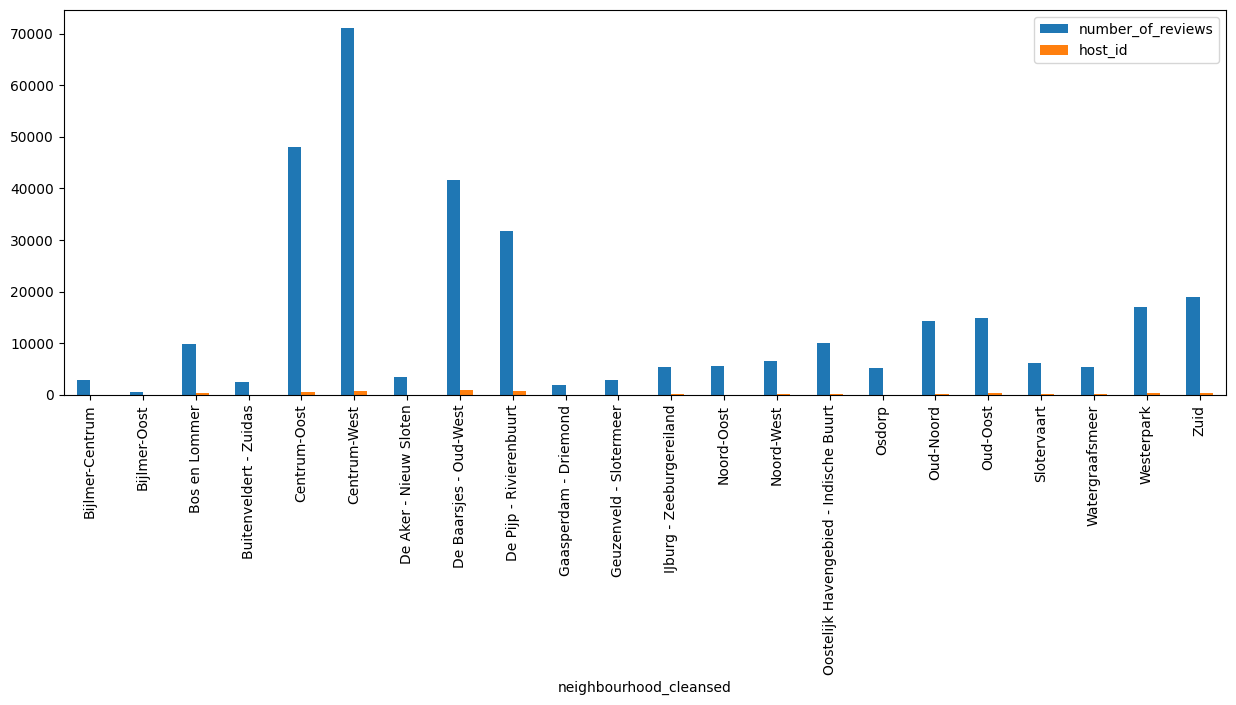

In [17]:
reviews = df.groupby('neighbourhood_cleansed').agg({'number_of_reviews': 'sum', 'host_id': 'nunique'})
reviews.plot(kind='bar', figsize=(15, 5))

- 2. Quels sont les pourcentage d’acceptation et de réponse moyen des hosts?

<AxesSubplot: >

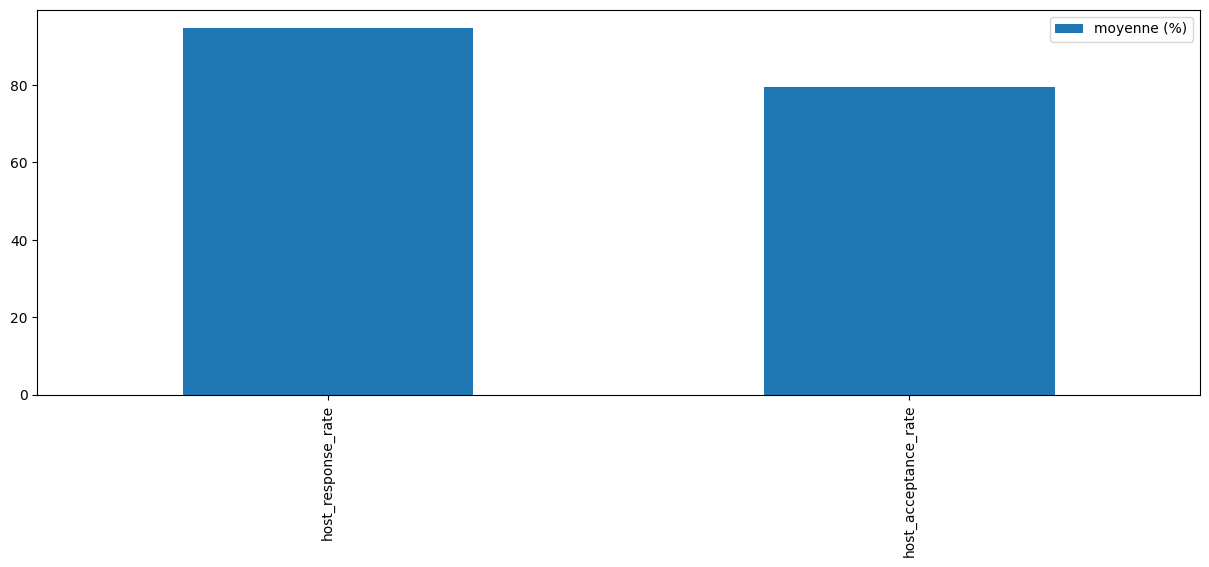

In [32]:
df[['host_response_rate', 'host_acceptance_rate']] = df[['host_response_rate', 'host_acceptance_rate']].replace('%', '' , regex=True ).astype(float)
moyennes = df[['host_response_rate', 'host_acceptance_rate']].mean()
moyennes = moyennes.rename(index='moyenne (%)')
moyennes = moyennes.to_frame().T
moyennes.plot(kind='bar', figsize=(15, 5))


3. Quel pourcentage des hosts on une vérification:
- ○ par téléphone
- ○ par email
- ○ par email pro

In [ ]:
df = pd.read_csv('listings.csv')
df['host_verifications'] = df['host_verifications'].apply(lambda x: x.replace("[","").replace("]","").replace("'","").split(","))
verifications = df['host_verifications'].explode()
verifications = verifications.str.strip()
verifications = verifications.value_counts()
verifications

In [ ]:
phone_verifications = verifications['phone']
email_verifications = verifications['email']
work_verifications = verifications['work_email']
total_verifications = phone_verifications + email_verifications + work_verifications

phone_pourcentage = (phone_verifications / total_verifications) * 100
email_pourcentage = (email_verifications / total_verifications) * 100
work_pourcentage = (work_verifications / total_verifications) * 100

verification_pourcentages = {
    'par téléphone': phone_pourcentage,
    'email': email_pourcentage,
    'email pro': work_pourcentage,
}

verification_pourcentages_df = pd.DataFrame(verification_pourcentages, index=['Pourcentage (%)'])
verification_pourcentages_df


**4.En fonction du room type, calculez le nombre moyen d’ “amenities”son écart type.**

In [ ]:
df = pd.read_csv('listings.csv')
df['amenities'] = df['amenities'].apply(lambda x: x.replace('"',"").split(","))
amenities = df['amenities'].explode()
amenities = amenities.str.strip()
amenities.value_counts()
groupe_room_type = df.groupby('room_type')
amenities_groupe = groupe_room_type['amenities'].agg(lambda x: x.str.len().mean())
amenities_groupe

- 5. Quel est le prix median par type de room, le maximum, le minimum, le premier et le troisième quartile?

In [ ]:
df = pd.read_csv('listings.csv')
groupe = df.groupby('room_type')
df['price'] = df['price'].apply(lambda x: x.replace('$', '').replace(',', ''))
df['price'] = df['price'].astype(float)
prix_median = groupe['price'].median()
prix_max = groupe['price'].max()
prix_min = groupe['price'].min()
prix_premier_quartile = groupe['price'].quantile(0.25)
prix_troisieme_quartile = groupe['price'].quantile(0.75)
#met tous dans un tableau pandas 
prix = pd.DataFrame({
    'prix_min': prix_min,
    'prix_premier_quartile': prix_premier_quartile,
    'prix_median': prix_median,
    'prix_troisieme_quartile': prix_troisieme_quartile,
    'prix_max': prix_max,
})
prix


- 6. Combien y-a-t-il d’annonces par valeur de salle de bain? (0.5 / 1 / 1.5 ….)?

In [ ]:
df = pd.read_csv('listings.csv')
df['bathrooms_text']


In [ ]:
df['bathrooms_text'].value_counts()

- 7. Si on considère qu’un "bath" vaut 1, qu’une bath shared et une half-bath vaut 0.5 et
qu’un private bath vaut 2. (2 half bath vaut donc 1)

In [ ]:
df = pd.read_csv('listings.csv')
mapping = {
    '1 bath': 1,
    '1.5 baths': 1.5,
    '1 private bath': 2,
    '2 baths': 2,
    '1 shared bath': 0.5,
    '1.5 shared baths': 0.75,
    '2.5 baths': 2.5,
    '3 baths': 3,
    '3.5 baths': 3.5,
    '0 shared baths': 0,
    '0 baths': 0,
    'Half-bath': 0.5,
    '5 baths': 5,
    '2 shared baths': 1,
    '4.5 baths': 4.5,
    'Private half-bath': 1,
    '4 baths': 4,
    '3 shared baths': 1.5,
    'Shared half-bath': 0.5,
    '5.5 baths': 5.5,
    '4 shared baths': 2,
    '17 baths': 17
}
df['bathrooms_text'] = df['bathrooms_text'].str.strip().map(mapping)
df['bathrooms_text']

- 8. Il y a t’il une corrélation entre le nombre de reviews et la taille de la description en
termes de nombre de caractères?

In [ ]:
df = pd.read_csv('listings.csv')
df['description_length'] = df['description'].str.len()
corr = df[['number_of_reviews', 'description_length']].corr()
corr
df.head(4)

- 9. On suspecte des faux commentaires. Pour identifier cela on regarde les séjours où le
nom de l’host est le même que le nom du reviewer. Quel est ce pourcentage général
de séjour où le nom de l'host est identique au nom du reviewer?

In [ ]:
df_list = pd.read_csv('listings.csv')
df_reviews = pd.read_csv('reviews.csv')
tableau_fusionne = pd.merge(df_list, df_reviews, left_on='id', right_on='listing_id')
tableau_fusionne['host_egale_review'] = tableau_fusionne['host_name'] == tableau_fusionne['reviewer_name']
somme = tableau_fusionne['host_egale_review'].sum()
ligne = tableau_fusionne.shape[0]
pourcentage = (somme / ligne) * 100
pourcentage